In [21]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False

In [39]:
# 막대 위에 숫자 표시 함수
def annotate_countplot(ax, spacing=5):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{int(height):,}',  # 예: 1,234
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, spacing),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

In [2]:
# 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
# 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df, n):
    print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
    summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
    summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

    summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
    summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산
    
    for i in range(n):
        summary[f"{i+1}번째 값"] = df.iloc[i].values
    
    return summary                                                     # 요약 테이블 반환

In [3]:
df1 = pd.read_csv('결측치 처리/병합/train_1_회원정보_병합.csv')

In [41]:
with pd.option_context('display.max_rows', None):
    display(resumetable(df1, 5))

데이터셋 크기: (2400000, 77)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값,4번째 값,5번째 값
0,기준년월,int64,0,6,201807,201807,201807,201807,201807
1,ID,object,0,400000,TRAIN_000000,TRAIN_000001,TRAIN_000002,TRAIN_000003,TRAIN_000004
2,남녀구분코드,int64,0,2,2,1,1,2,2
3,연령,object,0,6,40대,30대,30대,40대,40대
4,회원여부_이용가능,int64,0,2,1,1,1,1,1
5,회원여부_이용가능_CA,int64,0,2,1,1,1,1,1
6,회원여부_이용가능_카드론,int64,0,2,0,1,0,0,1
7,소지여부_신용,int64,0,2,1,1,1,1,1
8,소지카드수_유효_신용,int64,0,5,1,1,1,2,1
9,소지카드수_이용가능_신용,int64,0,4,1,1,1,2,1


## 고윳값 1개 or 불균형 컬럼 파악

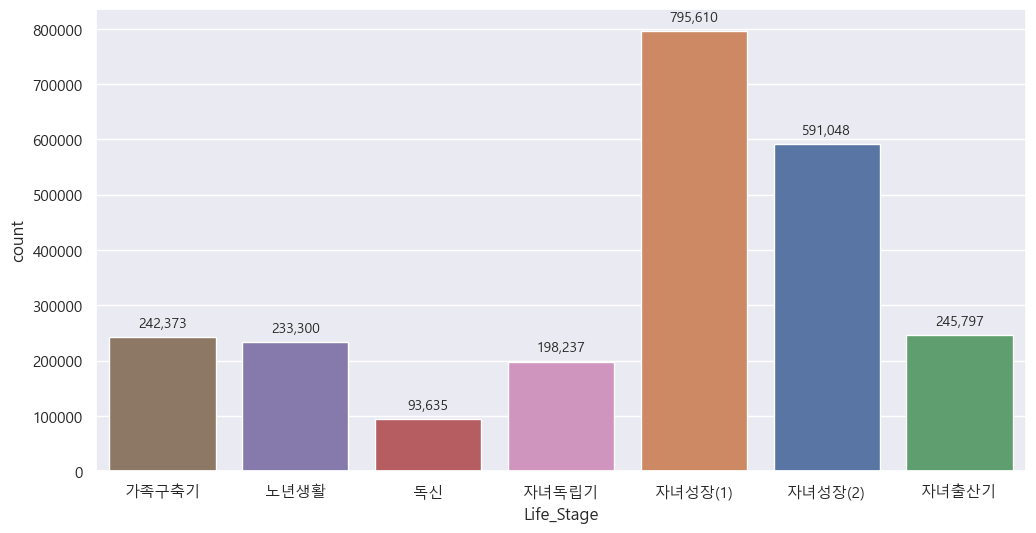

In [107]:
col = 'Life_Stage			'.strip()
order = sorted(df1[col].unique())

ax = sns.countplot(data=df1, x=col, hue=col, order=order)
annotate_countplot(ax)
plt.show()

In [104]:
zero_count = (df1['청구금액_제휴연회비_B0M'] == 0).sum()
total = len(df1)
print(f"개수(비율): {zero_count} ({zero_count / total:.2%})")

개수(비율): 2399128 (99.96%)


In [56]:
df1[df1[col] == 0]

,기준년월,ID,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
15,201807,TRAIN_000015,2,40대,0,0,0,0,0,0,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),0
179,201807,TRAIN_000179,2,60대,0,0,0,0,0,0,...,0,0,0,0개,0개,0개,0개,0,노년생활,0
191,201807,TRAIN_000191,1,30대,0,0,0,0,0,0,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),0
370,201807,TRAIN_000370,1,30대,1,0,0,0,0,0,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,0
589,201807,TRAIN_000589,1,50대,0,0,0,0,1,0,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399769,201812,TRAIN_399769,2,40대,0,0,0,0,0,0,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),0
2399779,201812,TRAIN_399779,2,30대,0,0,0,0,0,0,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),0
2399935,201812,TRAIN_399935,1,30대,0,0,0,0,0,0,...,0,0,0,0개,0개,0개,0개,0,가족구축기,0
2399940,201812,TRAIN_399940,2,50대,1,0,0,0,0,0,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),0


In [109]:
# 고윳값 1인 컬럼 제거
cols_to_drop = [
    '이용카드수_체크_가족',
    '이용금액_R3M_체크_가족',
    '연회비할인카드수_B0M',
    '할인금액_기본연회비_B0M',
    '할인금액_제휴연회비_B0M',
    '상품관련면제카드수_B0M',
    '임직원면제카드수_B0M',
    '우수회원면제카드수_B0M',
    '기타면제카드수_B0M'
]

df1 = df1.drop(columns=cols_to_drop)

In [112]:
resumetable(df1,3)

데이터셋 크기: (2400000, 68)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값
0,기준년월,int64,0,6,201807,201807,201807
1,ID,object,0,400000,TRAIN_000000,TRAIN_000001,TRAIN_000002
2,남녀구분코드,int64,0,2,2,1,1
3,연령,object,0,6,40대,30대,30대
4,회원여부_이용가능,int64,0,2,1,1,1
...,...,...,...,...,...,...,...
63,청구금액_기본연회비_B0M,int64,0,14,0,0,0
64,청구금액_제휴연회비_B0M,int64,0,8,0,0,0
65,카드신청건수,int64,0,2,0,0,0
66,Life_Stage,object,0,7,자녀성장(2),자녀성장(1),자녀출산기


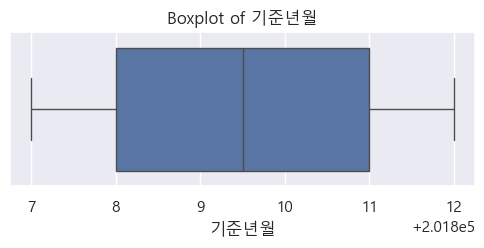

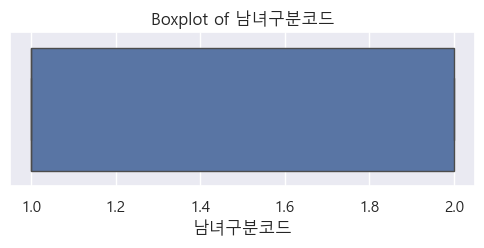

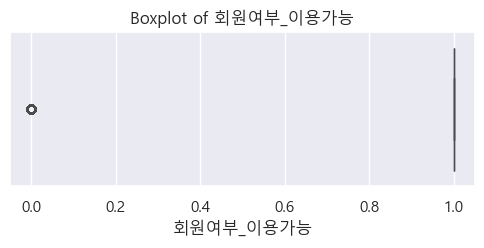

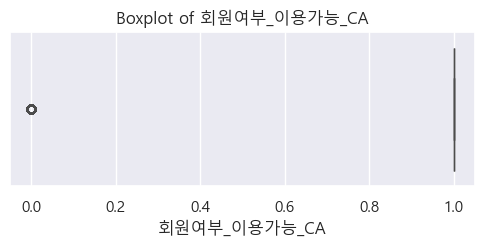

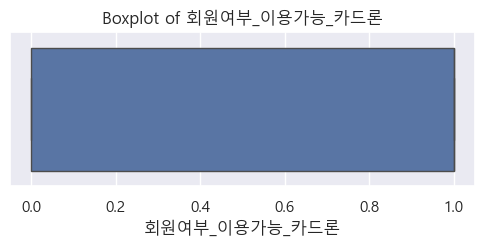

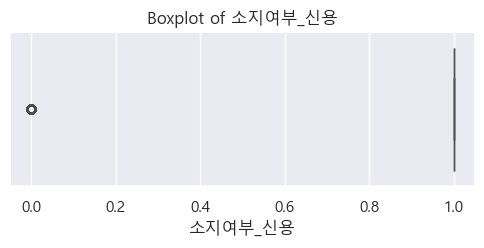

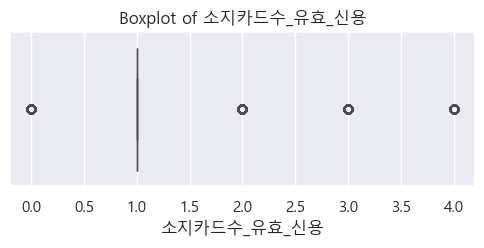

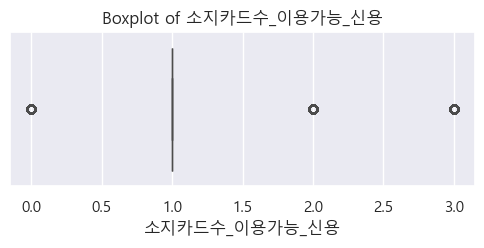

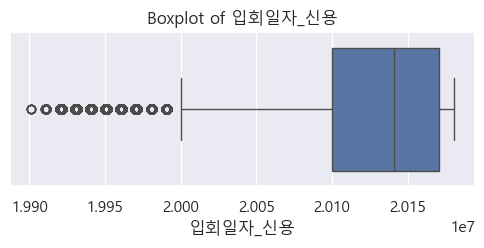

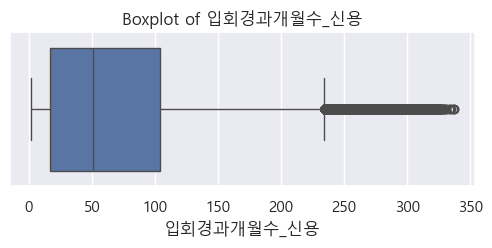

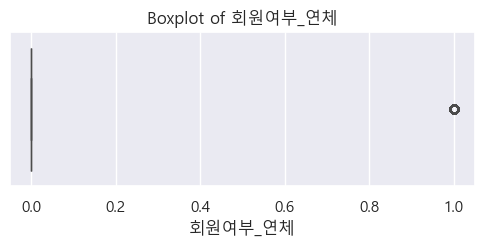

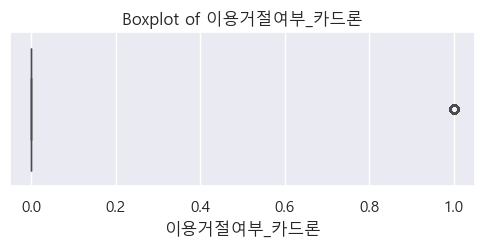

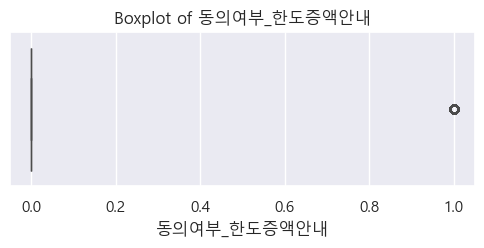

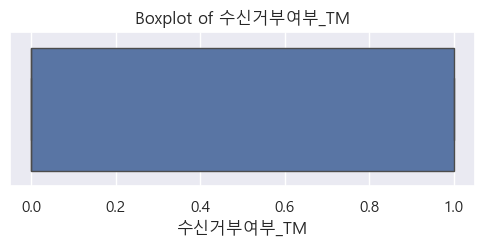

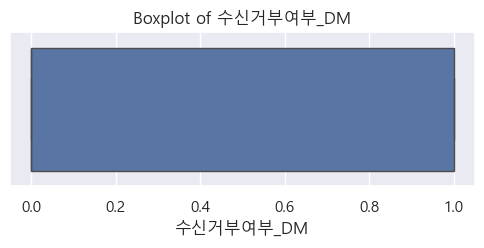

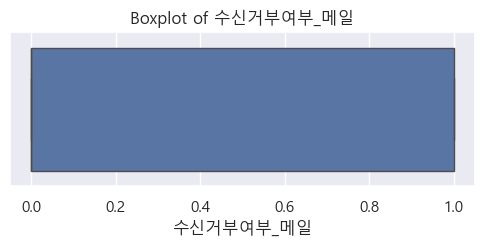

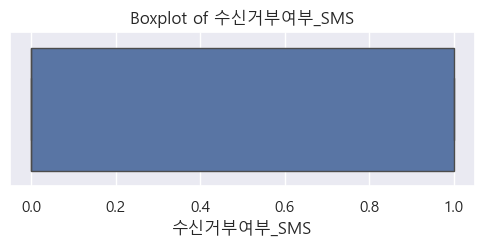

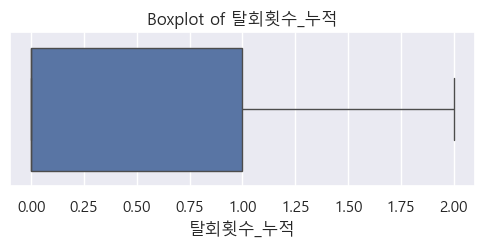

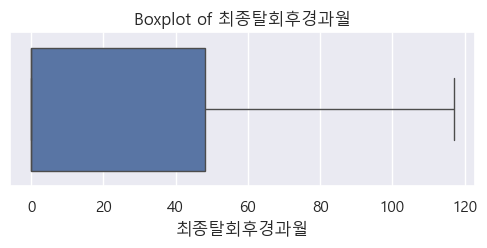

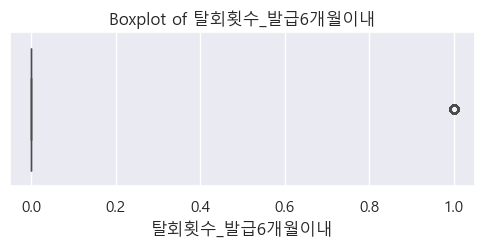

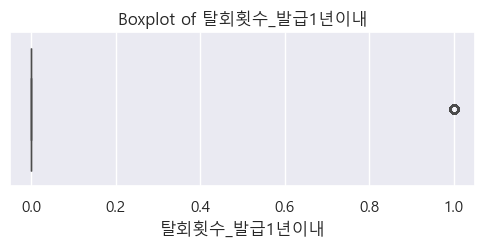

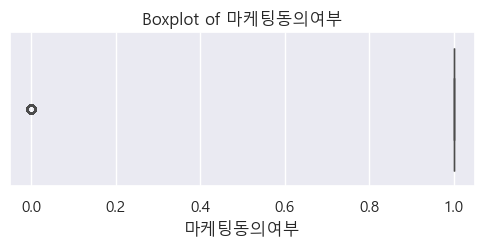

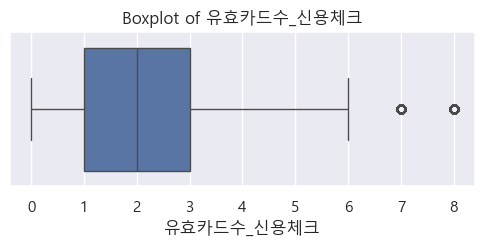

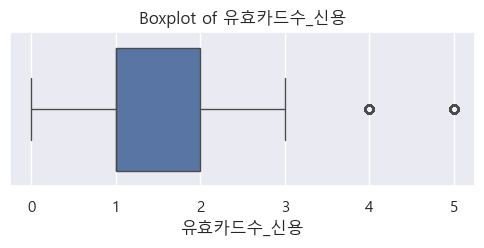

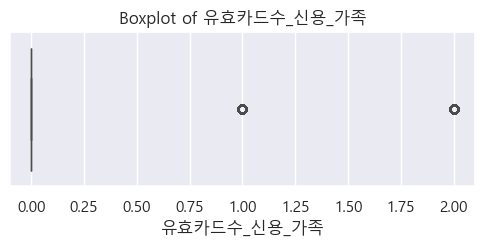

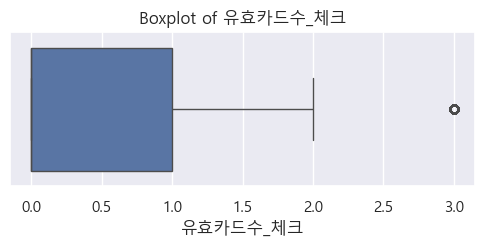

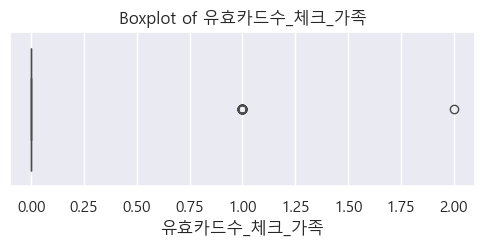

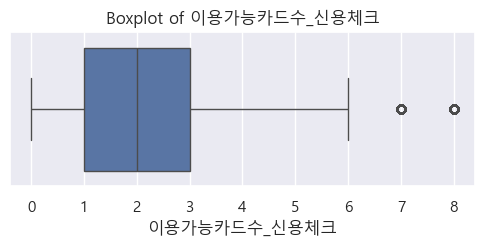

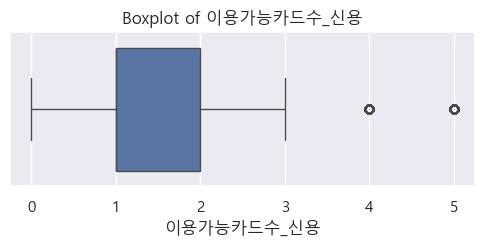

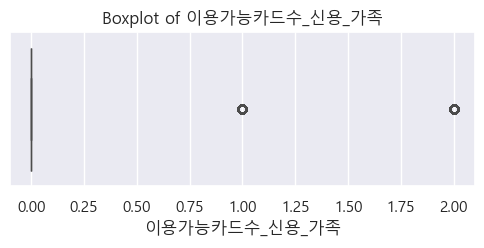

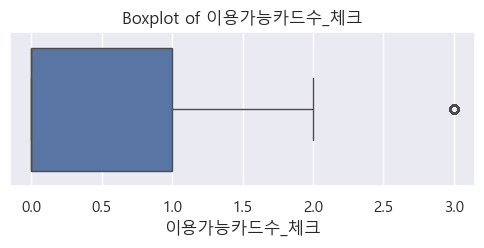

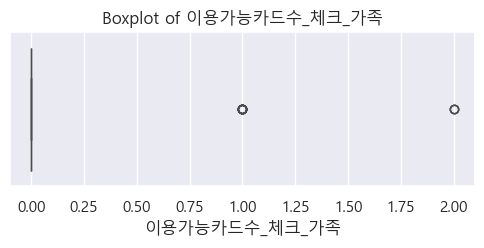

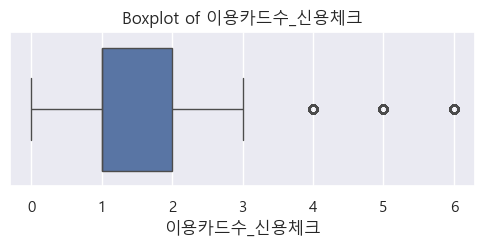

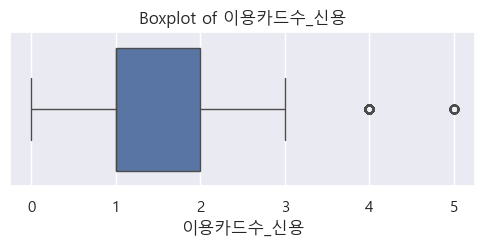

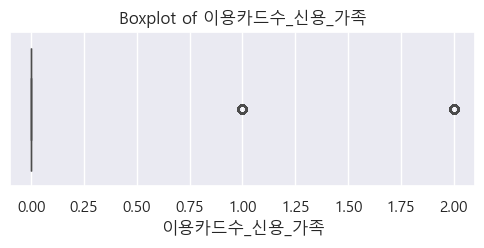

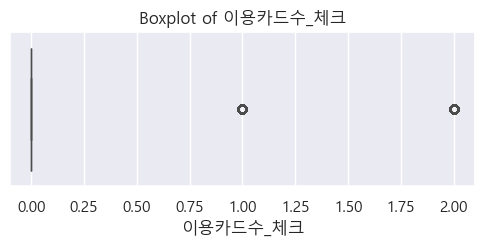

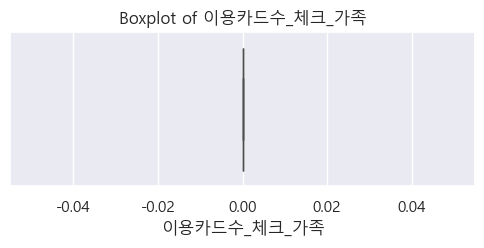

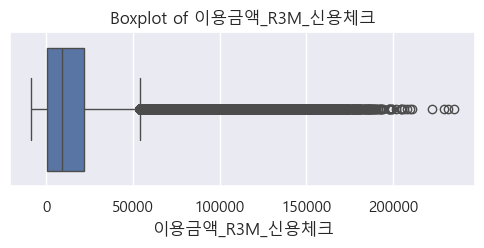

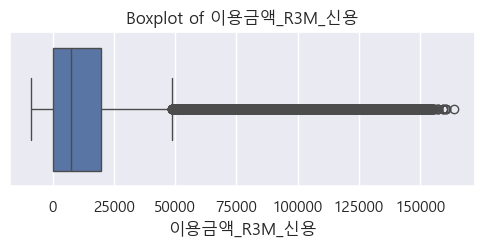

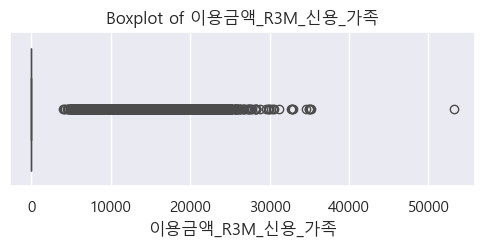

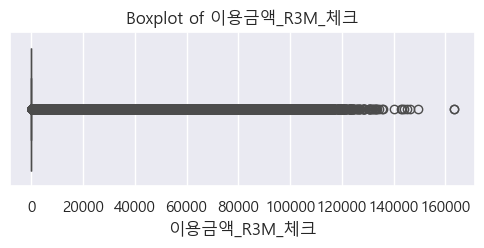

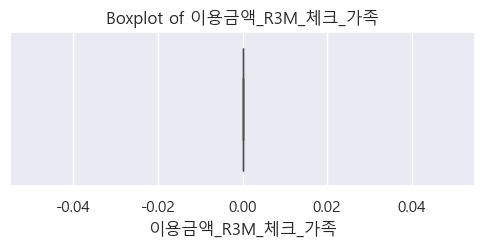

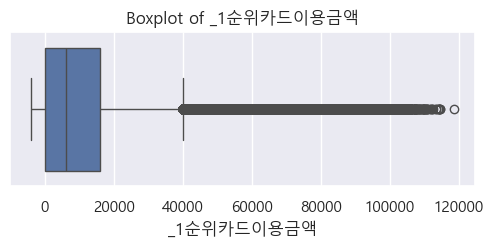

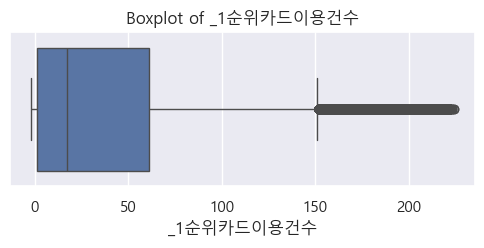

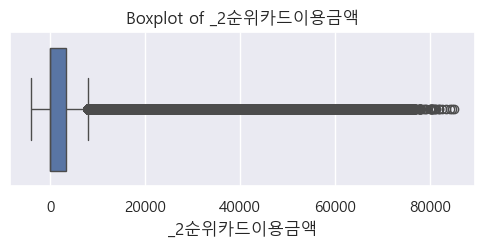

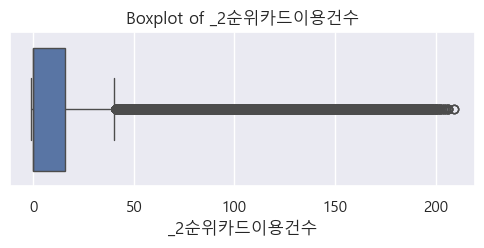

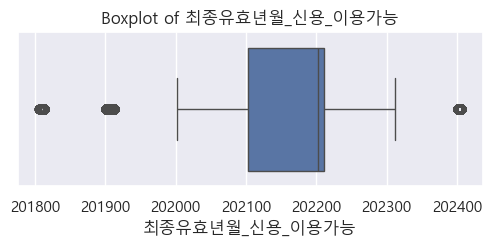

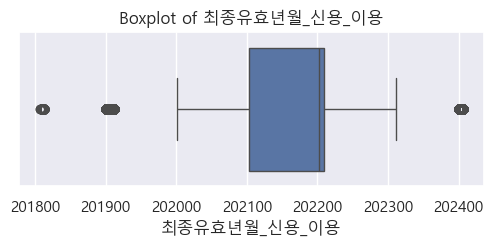

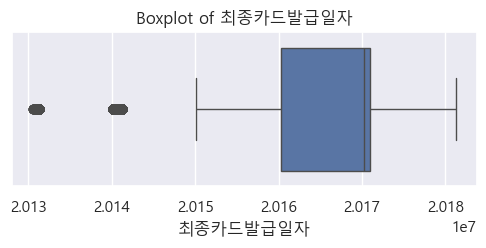

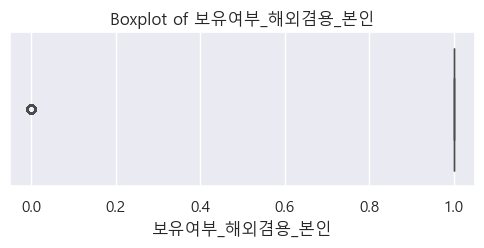

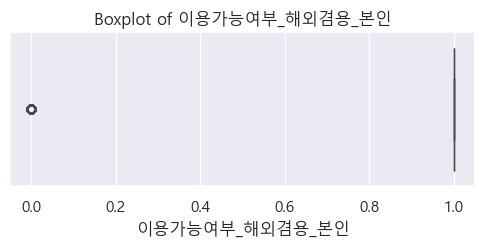

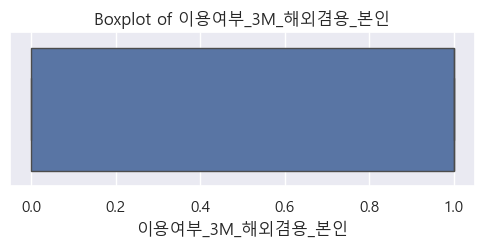

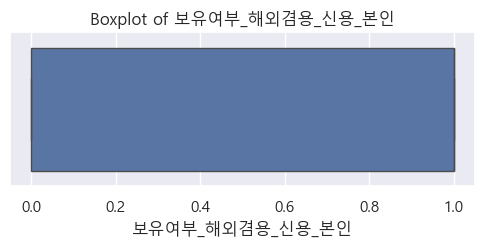

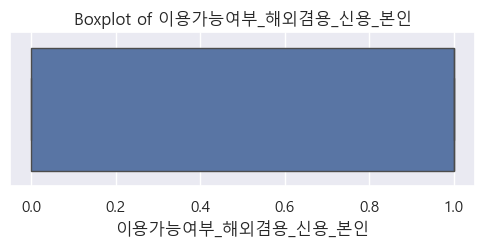

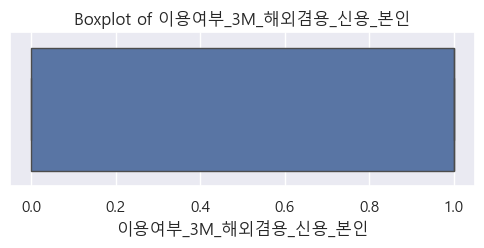

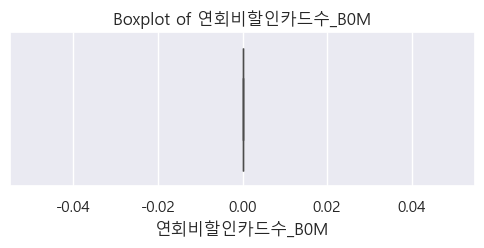

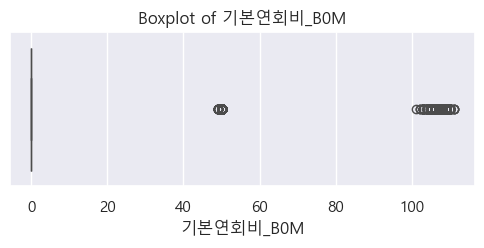

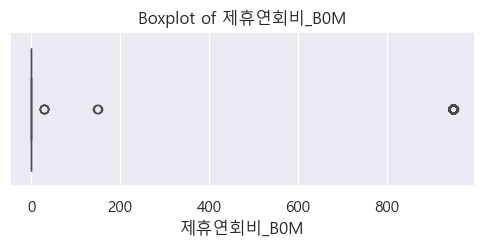

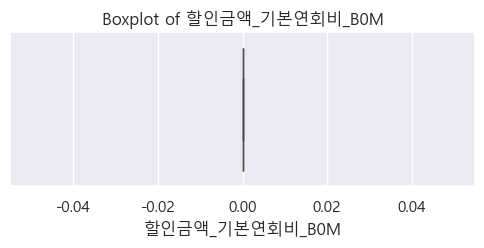

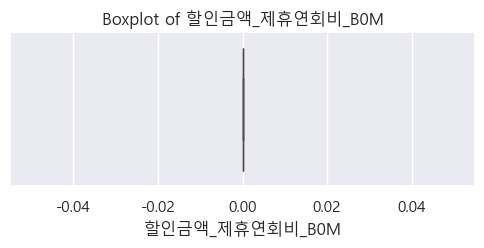

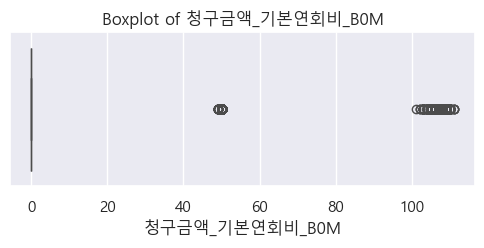

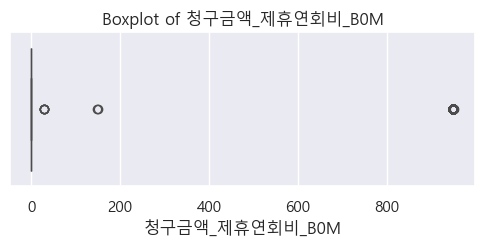

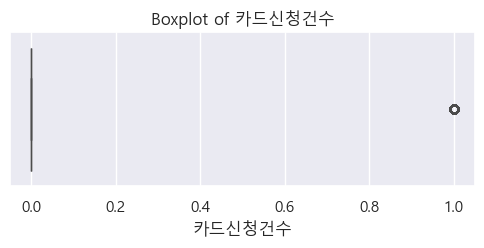

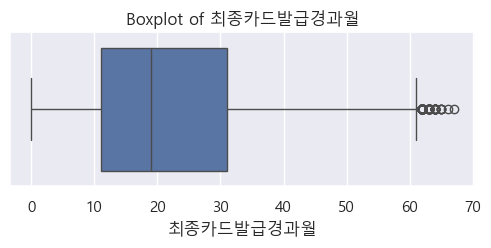

In [17]:
# numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# for col in numeric_cols:
#     plt.figure(figsize=(6, 2))
#     sns.boxplot(data=df1, x=col)
#     plt.title(f"Boxplot of {col}")
#     plt.show()

In [ ]:
# plt.figure(figsize=(6, 3))
# sns.histplot(df1[], bins=50, kde=True)
# plt.title(f"Distribution of {col}")
# plt.show()


In [5]:
# def column_stats(df):
#     stats = pd.DataFrame(index=df.columns)

#     # 최솟값
#     stats['최솟값'] = df1.apply(lambda x: x.min())

#     # 최댓값
#     stats['최댓값'] = df1.apply(lambda x: x.max())

#     # 최빈값 (여러 개일 경우 첫 번째 값만 표시)
#     stats['최빈값'] = df1.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

#     return stats


In [6]:
# with pd.option_context('display.max_rows',None):
#     display(column_stats(df1))

In [115]:
df1.to_csv('결측치 처리/병합/train_1_회원정보_unique1제거_68.csv', index=False, encoding='utf-8-sig')

In [8]:
# del df1

In [9]:
# gc.collect()

In [10]:
# import psutil

# process = psutil.Process()
# print(f"메모리 사용량: {process.memory_info().rss / 1024 ** 2:.2f} MB")
